<img src="udc1.png" alt="UDC"/>

# Notebook pour le traitement et classification d'images(déchets). 

### 1. Importation des bibliothèques(importation et pré-traitement).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import os
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import h5py

### 2. Création de la classe d'importation des données.

In [2]:
class Importaion:
    def __init__(self, list_chemin,extension=('.png', '.jpg', '.jpeg',".JPG"),images_size=225):
        self.list_chemin = list_chemin
        self.extension = extension
        self.image_size = images_size
        self.name_label = []
    def importation_donnees(self):
          image1 = []
          label1=  []
          for lis in self.list_chemin:
              n_list = lis.split("/")
              self.name_label.append(n_list[-1])
              for fichier in tqdm(os.listdir(lis)):
                  if fichier.endswith(self.extension):
                      try:
                          chemin_image = os.path.join(lis, fichier)
                          image = Image.open(chemin_image)
                          image = image.resize((self.image_size,self.image_size))
                          image = np.array(image)
                          if image.shape == (self.image_size,self.image_size,3):
                              image1.append(image)
                              label = n_list[-1]
                              label1.append(label)
                      except OSError as e:
                         pass
          paires = list(zip(image1, label1))
          random.seed (0)
          random.shuffle(paires)
          image2, label2 = zip(*paires)
          data = pd.DataFrame({'Image': image2, 'Label': label2})
          return data , self.name_label
   
    def visualisation(self,data,depart=0,final=1,color=True):
          for i in range(depart,final):
              plt.figure()
              if color==True:
                  plt.imshow(data["Image"][i])
              else:
                   if data["Image"][i].shape[3] ==  3:
                      data["Image"][i].shape[3] == 0 
                      plt.imshow(data["Image"][i],cmap="gray")
              plt.title(data["Label"][i])
              #plt.axis("off")
             # plt.savefig("{}{}{}".format("C:/Users/Moi/Desktop",data["Label"][i],".png"))
              plt.show()

### 3.Création de la classe pour  le pré-traitement des données(Pre-Processing).

In [3]:
class Pre_traitement:
    def __init__(self,data):
        self.data = data
        self.test = False
        if type(self.data["Label"][0]) == str:
             self.test=True
    def encodage(self,list_name):
        data_tset=pd.DataFrame(self.data['Label'])
        code={}
        self.decode=[]
        i=0
        for name in list_name:
            code[name]=i
            self.decode.append(name)
            i +=1
        if self.test == True:  
            for col in (data_tset):
                data_tset.loc[:,col]=data_tset[col].map(code)
                self.data['Label']=data_tset
            self.test=False
        return self.data
    def creation_data(self,data,name_train,name_test,test_size=0.2,shuffle=True):
     data_train,data_test=train_test_split(data,test_size=test_size,random_state=40,shuffle=shuffle)
     data_train_dict={"Image":data_train['Image'].tolist(),'Label':data_train['Label'].tolist()}
     data_test_dict={"Image":data_test['Image'].tolist(),'Label':data_test['Label'].tolist()}
     try:
             
         with h5py.File(name_train, 'w') as hdf5_file:
            
            hdf5_file.create_dataset('X_train', data=np.array(data_train_dict['Image']))
            hdf5_file.create_dataset('Y_train', data=np.array(data_train_dict['Label']))
         with h5py.File(name_test, 'w') as hdf5_file:
            
            hdf5_file.create_dataset('X_test', data=np.array(data_test_dict['Image']))
            hdf5_file.create_dataset('Y_test', data=np.array(data_test_dict['Label']))
     except  OSError as e :
         if "unable to truncate a file which is already open" in str(e):
            print(f"Le fichier{name_train} ou {name_test} existe déjà !!!")


### 4. Utilisation de nos classes.

In [4]:
batterie = r"C:/Users/Moi/Desktop/AAAD/Garbage classification/Garbage classification/Batterie"
Canette = r"C:/Users/Moi/Desktop/AAAD/Garbage classification/Garbage classification/Canette"
Carton = r"C:/Users/Moi/Desktop/AAAD/Garbage classification/Garbage classification/Carton"
Chaussure = r"C:/Users/Moi/Desktop/AAAD/Garbage classification/Garbage classification/Chaussure"
Metal= r"C:/Users/Moi/Desktop/AAAD/Garbage classification/Garbage classification/Métal"
Organique = r"C:/Users/Moi/Desktop/AAAD/Garbage classification/Garbage classification/Organique"
Papier = r"C:/Users/Moi/Desktop/AAAD/Garbage classification/Garbage classification/Papier"
Plastique = r"C:/Users/Moi/Desktop/AAAD/Garbage classification/Garbage classification/Plastique"
Textile = r"C:/Users/Moi/Desktop/AAAD/Garbage classification/Garbage classification/Textile"
Verre = r"C:/Users/Moi/Desktop/AAAD/Garbage classification/Garbage classification/Verre"
gans = r"C:/Users/Moi/Documents/garbage_classification/Gans"

In [5]:
data = Importaion(list_chemin=[gans])
dataset, list_name = data.importation_donnees()

100%|████████████████████████████████████████████████████████████████████████████| 11044/11044 [05:12<00:00, 35.28it/s]


In [6]:
data_tret=Pre_traitement(dataset)

In [7]:
dat=data_tret.encodage(list_name)

In [9]:
data_tret.creation_data(data=dat,name_train='trainset_gans.hdf5',name_test='testset_gans.hdf5',test_size=0.15)

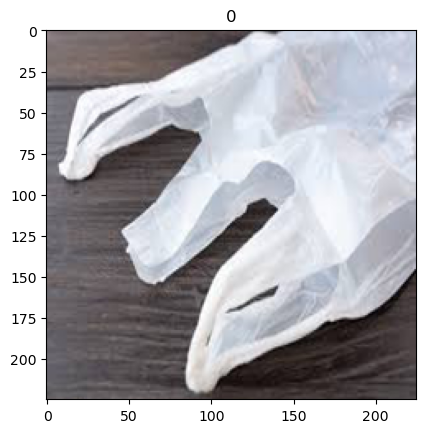

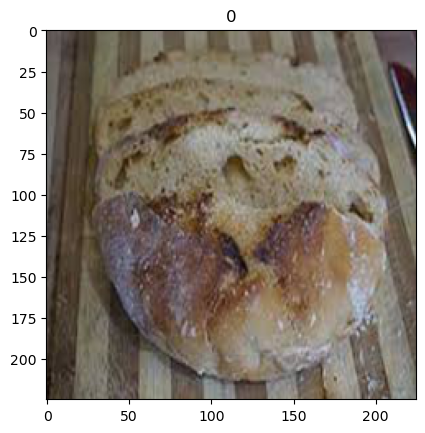

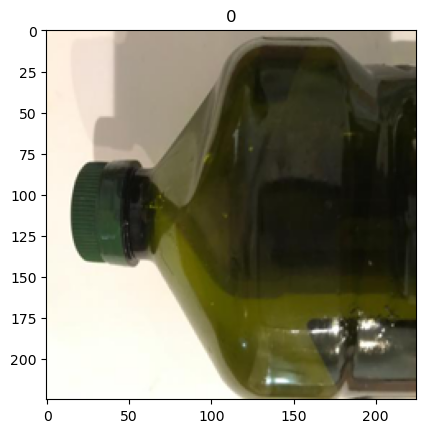

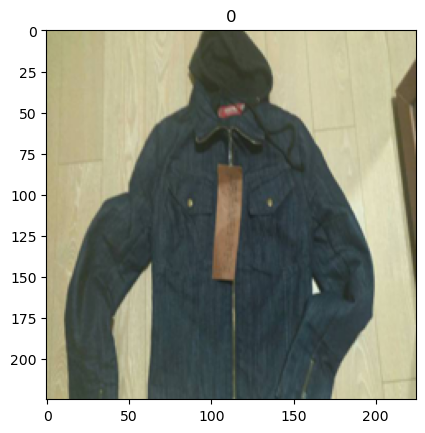

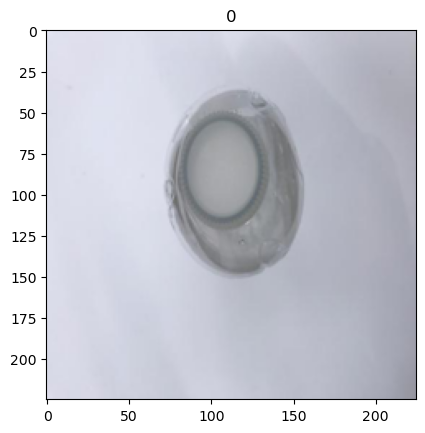

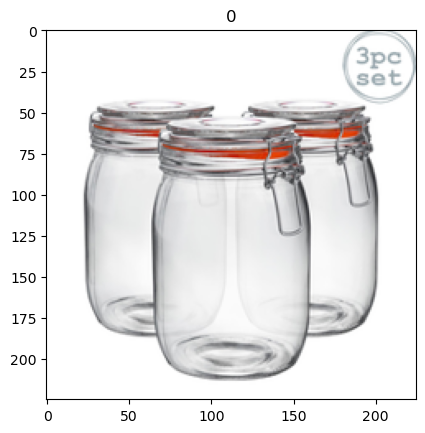

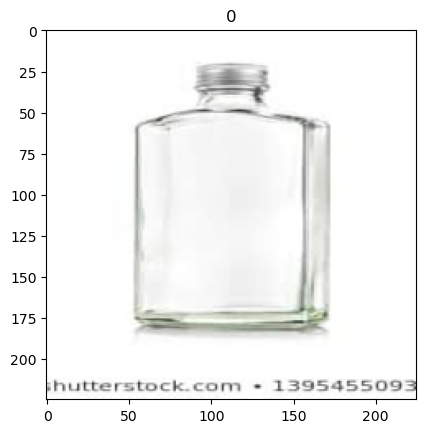

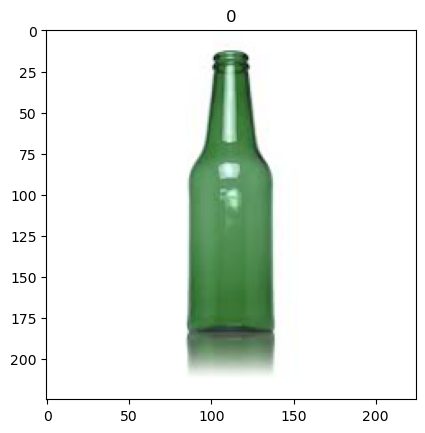

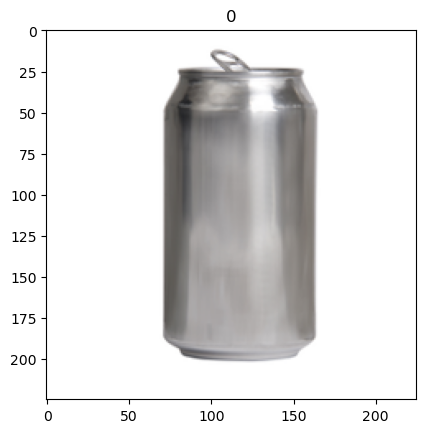

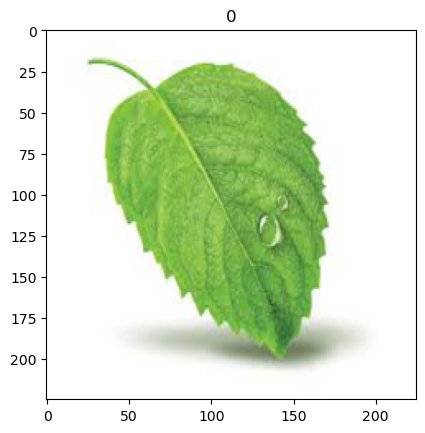

In [12]:
data.visualisation(dat,final=10)

In [1]:
list_name

NameError: name 'list_name' is not defined

In [2]:
['Batterie',
 'Canette',
 'Carton',
 'Chaussure',
 'Métal',
 'Organique',
 'Papier',
 'Plastique',
 'Textile',
 'Verre']


['Batterie',
 'Canette',
 'Carton',
 'Chaussure',
 'Métal',
 'Organique',
 'Papier',
 'Plastique',
 'Textile',
 'Verre']

In [11]:
<iframe width="1366" height="768" src="https://www.youtube.com/embed/2SKNA0_JSm0" title="Pourquoi l&#39;empire colonial français est-il aussi médiocre ?" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

SyntaxError: invalid syntax (809391015.py, line 1)